### 1. Bokeh

In [2]:
# !pip install bokeh

In [1]:
import bokeh.sampledata

bokeh.sampledata.download()

Creating C:\Users\Conet\.bokeh directory
Creating C:\Users\Conet\.bokeh\data directory
Using data directory: C:\Users\Conet\.bokeh\data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Do

In [3]:
# Standard imports
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [4]:
#그래프 도화지 생성하고 크기 설정
p = figure(plot_width=800, plot_height=600,
title="bokeh 예제 그래프",
x_axis_label="X", y_axis_label="Y")
rec_x = [1, 3, 5, 7, 9]
rec_y = [8, 7, 3, 8, 15]
cir_x = [9, 15, 4, 6, 13]
cir_y = [8, 4, 11, 6, 13]
#스퀘어 그래프 추가하기
p.square(rec_x, rec_y, size=12, color = 'green', alpha = 0.6)
#원형 그래프 추가하기
p.circle(cir_x, cir_y, size=12, color = 'red')
output_notebook()
show(p)

Loading BokehJS ...

In [7]:
from bokeh.layouts import gridplot
from bokeh.plotting import output_file
# figure를 html파일로 저장
# output_file("line.html")
#그림을 그릴 사이즈 지정
p1 = figure(plot_width=300, plot_height=300, title="line plot")
#라인차트 그리기 p.line([x값 데이터],[y값 데이터])
p1.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
p2 = figure(plot_width=300, plot_height=300, title="stair plot")
#계단모양 차트 그리기
p2.step([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2, mode="center")
p3 = figure(plot_width=300, plot_height=300, title="mulit-line plot")
#여러 선을 한번에 그릴떄
p3.multi_line([[1, 3, 2], [3, 4, 6, 6]], [[2, 1, 4], [4, 7, 8, 5]], color=["firebric"], alpha=[0.8, 0.3], line_width=4)
# subplot들을 합침
layout = gridplot([[p1, p2, p3]])
show(layout)

In [8]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL
df = pd.DataFrame(AAPL)
df

,date,open,high,low,close,volume,adj_close
0,2000-03-01,118.56,132.06,118.50,130.31,38478000,31.68
1,2000-03-02,127.00,127.94,120.69,122.00,11136800,29.66
2,2000-03-03,124.87,128.23,120.00,128.00,11565200,31.12
3,2000-03-06,126.00,129.13,125.00,125.69,7520000,30.56
4,2000-03-07,126.44,127.44,121.12,122.87,9767600,29.87
...,...,...,...,...,...,...,...
3265,2013-02-25,453.85,455.12,442.57,442.80,13306400,437.00
3266,2013-02-26,443.82,451.54,437.66,448.97,17910700,443.09
3267,2013-02-27,448.43,452.44,440.65,444.57,20976800,438.75
3268,2013-02-28,444.05,447.87,441.40,441.40,11518400,435.62


In [9]:
#pd.to_datetime 함수는 주어진 인수를 datetime 으로 변환★
df["date"] = pd.to_datetime(df["date"])
# output_file("datetime.html")
#도화지 준비 (x축 x_axis_type 타입)
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
#x축은 날짜/y축은 종가
p.line(df["date"], df["close"], color="navy", alpha=0.5)
show(p)

In [10]:
#output_notebook()
p1 = figure(plot_width=400, plot_height=400, title="vertical bar plot")
#보케에서는 p.bar함수가 아니라 vertical 해서 vbar/ 가로는 hbar
# 세로 막대 차트
p1.vbar(x=[1, 2, 3], width=0.5, bottom=0, top=[1.2, 2.5, 3.7], color="firebrick")
p2 = figure(plot_width=400, plot_height=400, title="horizontal bar plot")
# 가로 막대 차트
p2.hbar(y=[1, 2, 3], height=0.5, left=0, right=[1.2, 2.5, 3.7], color="navy")
layout = gridplot([[p1, p2]])
show(layout)

In [11]:
# 벌집차트
import numpy as np
from bokeh.io import output_file, show
from bokeh.plotting import figure
#벌집 모양을 위한 임포트
from bokeh.util.hex import axial_to_cartesian
#데이터 넣기
q = np.array([0,0,0,-1,-1,1,1])
r = np.array([0,-1,1,0,1,-1,0])
p = figure(plot_width=400, plot_height=400, toolbar_location=None)
p.grid.visible = False
#벌집모양 p.hex_tile
p.hex_tile(q,r,size=1, fill_color=["firebrick"]*3 + ['navy']*4,
line_color="white", alpha=0.3)
x, y = axial_to_cartesian(q,r,1, "pointytop")
#그래프 안에 글자넣기
p.text(x,y, text=["(%d, %d)" % (q,r) for (q,r) in zip(q,r) ],
text_baseline="middle", text_align="center")
show(p)

In [17]:
# Plot a complex chart with interactive hover in a few lines of code
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap
df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)
group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)
p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manuf", x_range=group, toolbar_location=None, tools="")
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2
index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#ffffbf'], factors=sorted(df.cyl.unique()), end=1)
p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
line_color="white", fill_color=index_cmap,
hover_line_color="darkgrey", hover_fill_color=index_cmap)
p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))
show(p)

In [18]:
# Create and deploy interactive data applications
from IPython.display import IFrame
IFrame('https://demo.bokeh.org/sliders', width=900, height=500)

### Bokeh plotting

In [19]:
import numpy as np # we will use this later, so import it now
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [ ]:
p.wedge  # 파이차트 그릴 수 있음; bokeh에서

In [ ]:
p.hover  

In [20]:
import pandas as pd
import numpy as np

In [21]:
house_price = pd.read_csv("house_price.csv")
house_price

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


In [35]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      3293 non-null   object
 1   규모      3293 non-null   object
 2   연도      3293 non-null   int64 
 3   월       3293 non-null   int64 
 4   분양가     3293 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 128.8+ KB


In [36]:
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family = font_name)

<AxesSubplot:>

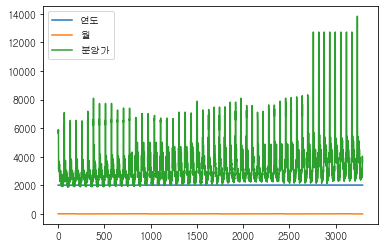

In [37]:
house_price.plot()

<AxesSubplot:xlabel='연도'>

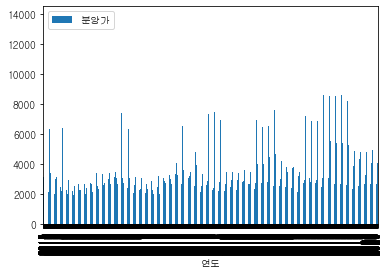

In [ ]:
house_price.plot(x = '연도', y = '분양가', kind = 'bar')

In [29]:
df2 = house_price.groupby('연도')['분양가'].sum()
df2

연도
2015     540218
2016    2312823
2017    2451040
2018    2400743
2019    2679270
2020     463269
Name: 분양가, dtype: int64

<AxesSubplot:ylabel='분양가'>

C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


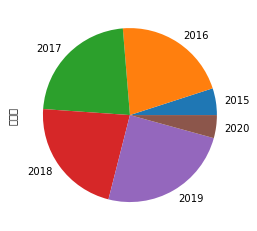

In [30]:
df2.plot(y='분양가', kind = 'pie')

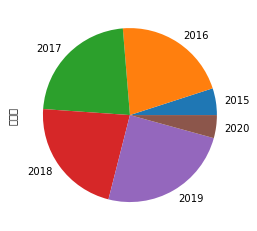

In [31]:
df2.plot(y='분양가', kind = 'pie');

<AxesSubplot:xlabel='월', ylabel='분양가'>

C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


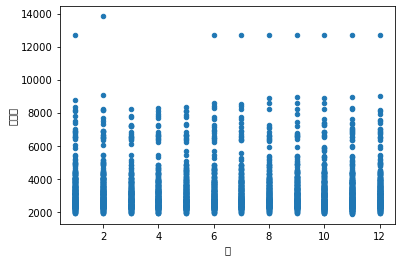

In [32]:
house_price.plot(x='월', y = '분양가', kind = 'scatter')

### 3. EDA

In [39]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale = 2)

In [40]:
sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [41]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
data.isnull().sum()  # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> Age, Cabin, Embarked에 빈 값이 있음

- How many people survived?

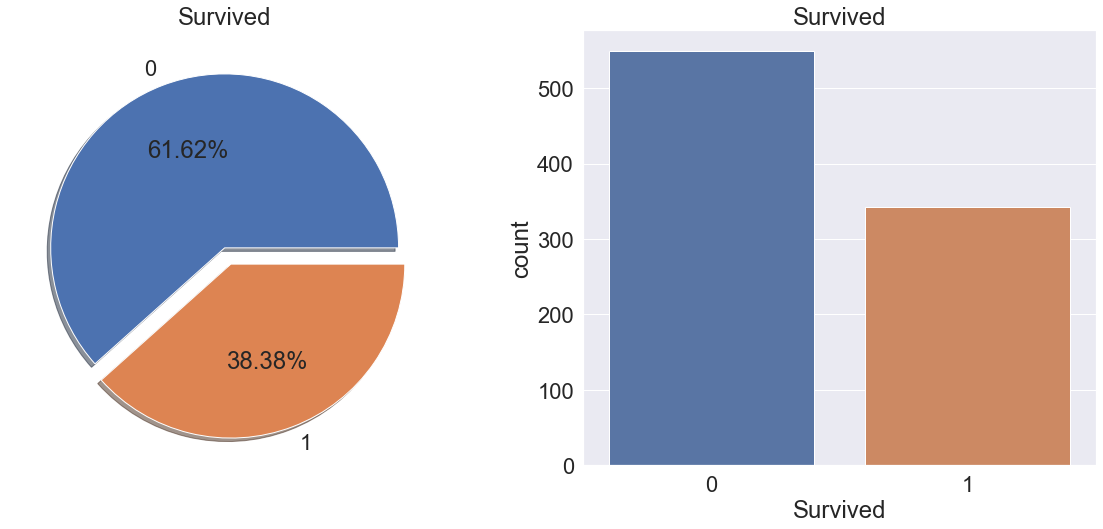

In [44]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1],  # explode로 띄어진 형태로
                                         autopct = '%1.2f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 성별에 따른 생존자 수

In [46]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [55]:
data.groupby(['Sex', 'Survived'])['Survived'].mean()

Sex     Survived
female  0           0.0
        1           1.0
male    0           0.0
        1           1.0
Name: Survived, dtype: float64

In [59]:
data[['Sex', 'Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


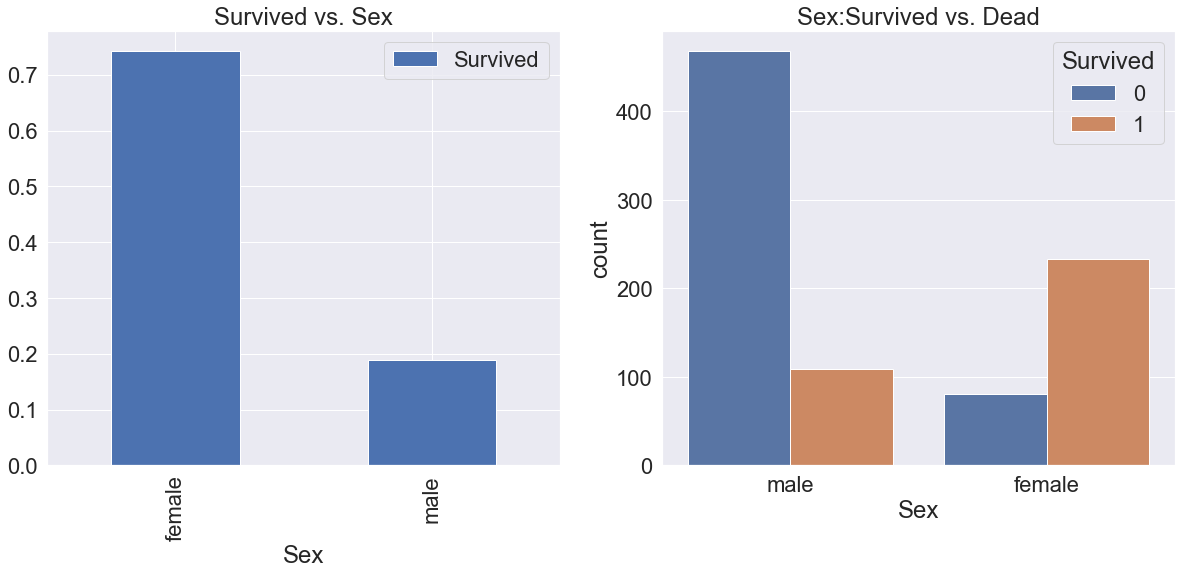

In [47]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs. Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs. Dead')
plt.show()

- 해석 주의하기

In [48]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


여자중에서 생존자의 비율

In [60]:
233 / (233 + 81)

0.7420382165605095

In [61]:
81 / (233 + 81)

0.25796178343949044

In [63]:
pd.crosstab([data['Sex'], data['Survived']], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

- What's in a Name?

In [64]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [65]:
# 호칭에 대한 값 뽑음
data['Initial'] = 0  

In [67]:
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    # 맨 뒤에 점이있고, 앞에 어떤 알파벳이든 출력

In [68]:
pd.crosstab(data.Initial, data.Sex, margins = True).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [71]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [72]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [73]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age']=46

In [74]:
data.Age.isnull().any() # NuLL값이 있는지 확인

False

KeyError: 'Survived'

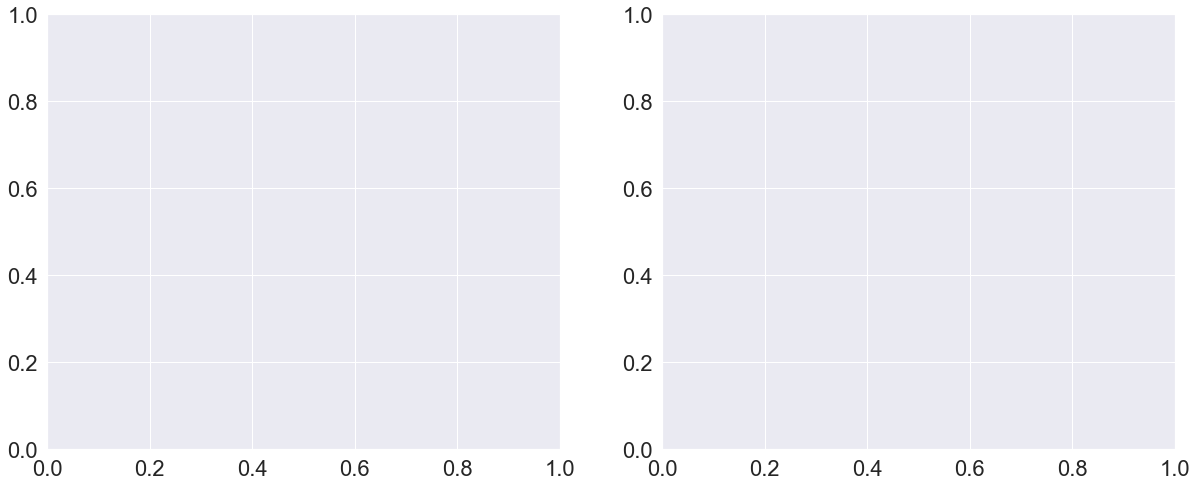

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Not Survived')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data.Survived==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('Survived')
ax[1].set_xticks(range(0, 85, 5))
plt.show()

https://velog.io/@lsmmay322/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-%EC%A0%9C%EB%8C%80%EB%A1%9C-%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EA%B8%B0

### 4. Folium 개요

folium은 leaflet.js 기반으로 만들어진 Python 지도 시각화 라이브러리로 interactive한 지도를 생성하고, 마커를 추가해서 기각화하거나 원으로 범위를 표기하고 html로 내보내기

In [80]:
!pip install folium

In [81]:
import folium

In [82]:
latitude = 37.55031155

longitude = 126.92553071

In [83]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )
m

In [86]:
folium.Marker([latitude, longitude],
              popup="홍익대",
              tooltip="홍익대학교").add_to(m)
m

ValueError: Marker location must be assigned when added directly to map.

In [87]:
folium.Marker([latitude, longitude],
              popup='<iframe width="560" height="315" src="https://www.youtube.com/embed/dpwTOQri42s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>',
              tooltip="홍익대").add_to(m)
m

ValueError: Marker location must be assigned when added directly to map.

In [88]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [89]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [90]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='Stamen Toner'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m